In [1]:
import Plots
Plots.pyplot()

Plots.PyPlotBackend()

微分方程式

$$ y'''-2yy'+Cy'=0 $$

を解く。$2yy'=(y^2)'$であるから、上の方程式は

$$ (y''-y^2+Cy)'=0 \ \text{すなわち} \ y''-y^2+Cy={\rm const.}$$

と書ける。$\lim_{t \rightarrow \infty}y=1$より、$\lim_{t \rightarrow \infty}y''=0$なので右辺の定数が決まり、

$$ y''-y^2+Cy=C-1 $$

である。これを初期条件$y(0)=0, y'(0)=1$のもとで解く。

In [2]:
const α=(π/4.0)^2
const Re=1e4

10000.0

In [3]:
y₀=[0.0; 1.0]

2-element Array{Float64,1}:
 0.0
 1.0

In [4]:
# dy/dt = y'
# dy'/dt= y²-Cy+C-1
function f(y,C)
    return [y[2], y[1]^2-C*y[1]+C-1]
end

f (generic function with 1 method)

In [5]:
# input:  y(t), 刻み幅h, パラメータC
# output: y(t+h)
function rk4_next(y,h,C)
    k₁ = h*f(y,C)
    k₂ = h*f(y+k₁/2.0,C)
    k₃ = h*f(y+k₂/2.0,C)
    k₄ = h*f(y+k₃,C)
    
    return y+(k₁+2k₂+2k₃+k₄)/6.0
end

rk4_next (generic function with 1 method)

In [6]:
function solve(;C=α/Re,span=10.0,Δt=1e-5)
    h=Δt
    t=0:h:span
    y=zeros([t';t'])
    A=[rk4_next([1.0;0.0],h,C) rk4_next([0.0;1.0],h,C)]
    
    for (i,τ) in enumerate(t)
        if(i==1)
            y[:,i]=y₀
        else
            y[:,i]=A*y[:,i-1]
        end
    end
    return (t,y[1,:],y[2,:])
end

solve (generic function with 1 method)

In [7]:
result=solve(C=α/Re,Δt=1e-5);

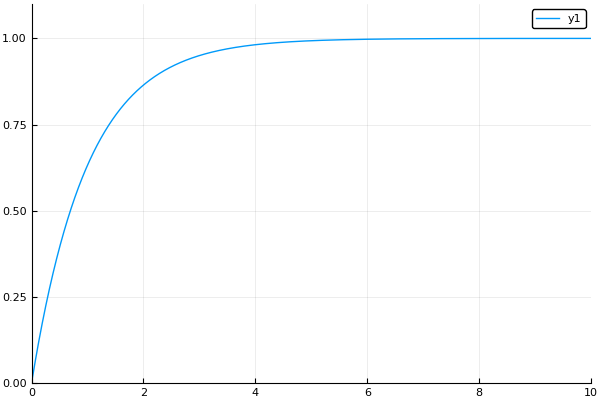

In [8]:
Plots.plot(result[1][1:100:end],result[2][1:100:end],ylims=(0,1.1))

In [9]:
result0=solve(C=0.0,Δt=1e-5);

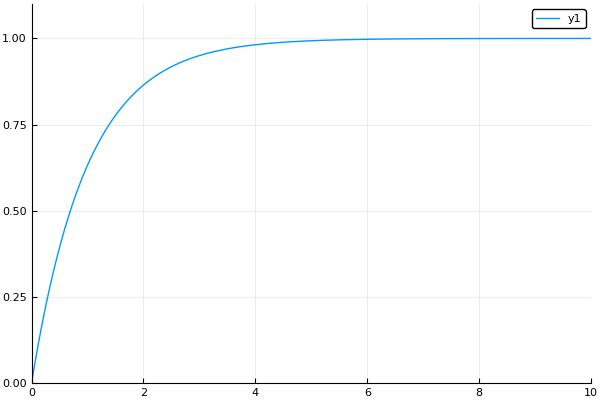

In [10]:
Plots.plot(result0[1][1:100:end],result0[2][1:100:end],ylims=(0,1.1))